In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aux import plot_boundary

sns.set()

# Support Vector Machines
## Clasificación

Para arrancar con el modelo SVM como clasificador (SVC), vamos a arrancar con datos sintéticos. Usamos un caso que no es linealmente separable

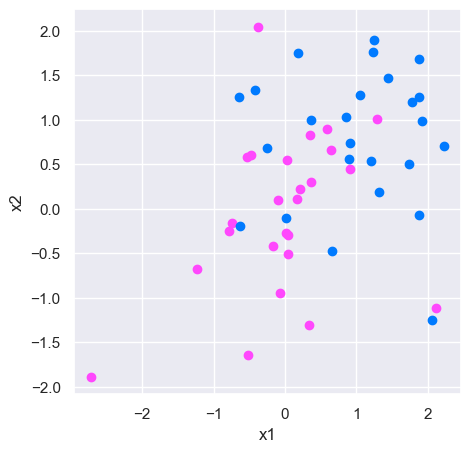

In [2]:
rng = np.random.default_rng(seed=1)

X = rng.standard_normal((50, 2)) 
y = np.array([-1]*25+[1]*25)
# Sumamos uno a la clase azul para desplazarlo 
X[y==1] += 1

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X[:25,0], X[:25,1], c="#ff48fd")
ax.scatter(X[25:,0], X[25:,1], c="#007aff")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Creamos un modelo SVC usando [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), definimos el caso lineal con C=10

In [3]:
from sklearn.svm import SVC

In [4]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

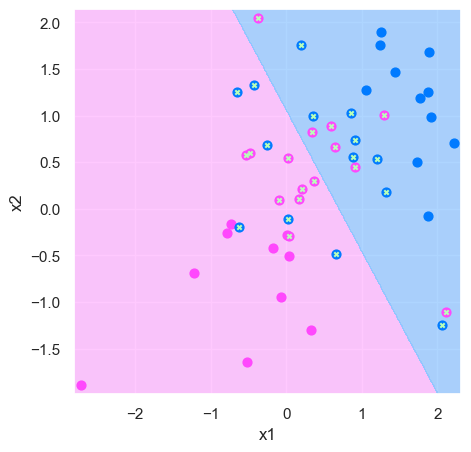

In [5]:
plot_boundary(X, y, svm_linear, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_linear.support_vectors_[:,0], svm_linear.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);


Veamos entrenar el modelo con un parametro mas chico C=0.1

In [6]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)

SVC(C=0.1, kernel='linear')

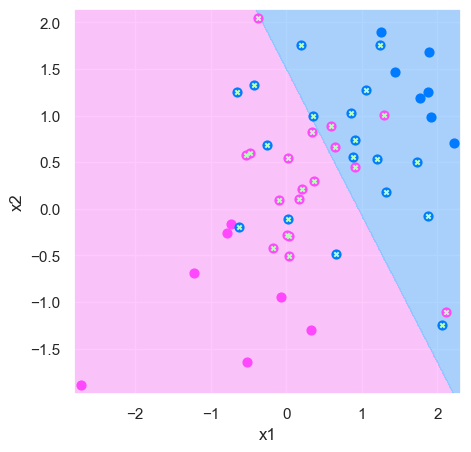

In [7]:
plot_boundary(X, y, svm_linear_small, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_linear_small.support_vectors_[:,0], svm_linear_small.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

Con SVC lineales podemos obtener los coeficientes de la recta de decisión:

In [8]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

Aprovechemos este caso sencillo para hacer una optimización del hiperparámetro C usando [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). En sklearn lo hacemos usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [9]:
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel='linear')

grid = GridSearchCV(svm_linear,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

Vemos que el mejor valor es cuando C=1

In [10]:
grid.best_params_

{'C': 1}

Podemos chusmear las metricas para cada caso:

In [11]:
grid.cv_results_['mean_test_score']

array([0.66, 0.66, 0.72, 0.74, 0.74, 0.74, 0.74])

In [12]:
grid.cv_results_['std_test_score']

array([0.10198039, 0.10198039, 0.07483315, 0.08      , 0.08      ,
       0.08      , 0.08      ])

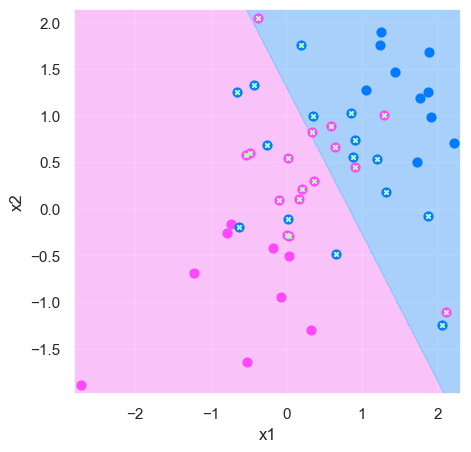

In [13]:
# No necesitamos entrenar el modelo porque con el parametro refit de GridSearchCV ya lo entrenó por nosotros
svm_best = grid.best_estimator_

plot_boundary(X, y, svm_best, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_best.support_vectors_[:,0], svm_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

Con esto podemos predecir la clase de un set de testeo

In [14]:
X_test = rng.standard_normal((20, 2)) 
y_test = np.array([-1]*10+[1]*10) 
X_test[y_test==1] += 1

y_pred = svm_best.predict(X_test)

Evaluamos usando la matriz de confusión

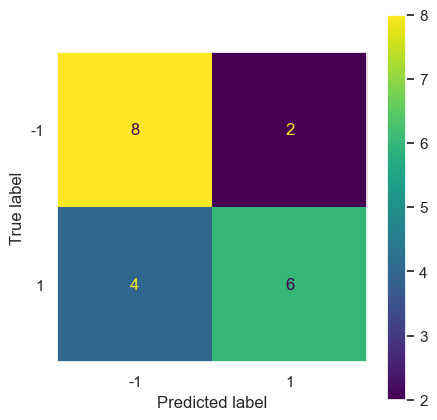

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=svm_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [16]:
from sklearn.metrics import accuracy_score

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 70%


---

Veamos un caso que es linealmente separable

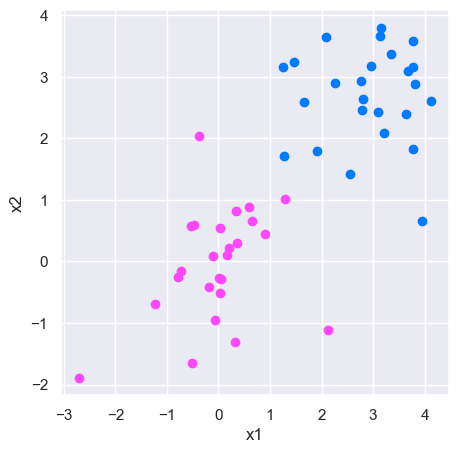

In [17]:
#Tomamos el caso sintentico anterior pero lo separamos mas
Xsep = X.copy()
Xsep[y==1] += 1.9

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(Xsep[:25,0], Xsep[:25,1], c="#ff48fd")
ax.scatter(Xsep[25:,0], Xsep[25:,1], c="#007aff")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Estamos en el caso de un modelo **Maximal Margin Classifier**

In [18]:
svm_separable = SVC(C=1e5, kernel='linear')
svm_separable.fit(Xsep, y)

SVC(C=100000.0, kernel='linear')

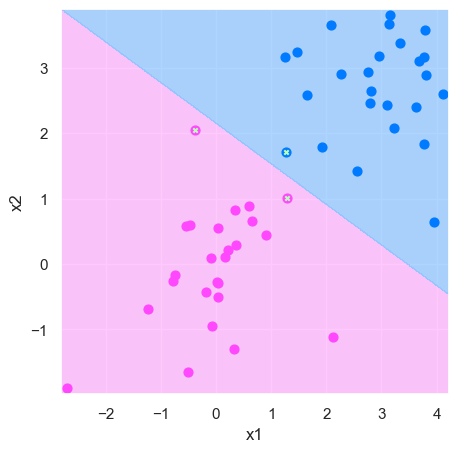

In [19]:
plot_boundary(Xsep, y, svm_separable, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)


# Grafiquemos los vectores de soporte
plt.scatter(svm_separable.support_vectors_[:,0], svm_separable.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

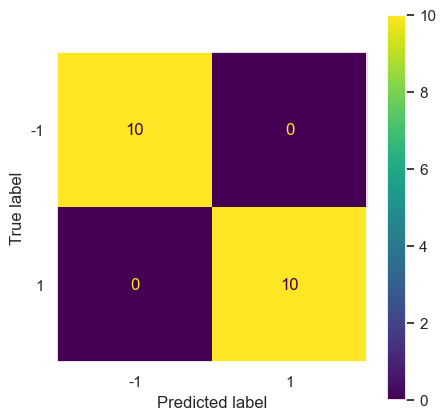

In [20]:
X_test[y_test==1] += 1.9
y_pred = svm_separable.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svm_separable.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

## Uso de funciones Kernels

Veamos ahora cuando clasificamos con un modelo con una frontera de decision no lineal usando una funcion kernel. 

Empezamos con la función kernel polinomica, que tenemos como hiperparámetro, además de la C, el orden del polinomio, que en [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) se pasa como  el argumento **gamma**. 

Pero, vamos a realizar primero una busqueda de posibles hiperparametro, tanto para C como para gamma usando **gridsearchCV**

In [21]:
svm_poly = SVC(kernel='poly')
#svm_poly.fit(X, y)
grid = GridSearchCV(svm_poly,
                    {'C': [1, 5, 10], 'degree': [2, 3, 4, 5]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 5, 10], 'degree': [2, 3, 4, 5]},
             scoring='accuracy')

In [22]:
# Vemos todos los datos de la busqueda como Dataframe que nos facilita la visualizacion
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000504,0.000141,0.000645,0.000512,1,2,"{'C': 1, 'degree': 2}",0.8,0.6,0.5,0.5,0.6,0.60,0.109545,7
1,0.000550,0.000354,0.000341,0.000240,1,3,"{'C': 1, 'degree': 3}",0.6,0.7,0.6,0.6,0.7,0.64,0.048990,3
2,0.000850,0.000764,0.000557,0.000689,1,4,"{'C': 1, 'degree': 4}",0.6,0.6,0.5,0.2,0.5,0.48,0.146969,12
3,0.000287,0.000036,0.000195,0.000008,1,5,"{'C': 1, 'degree': 5}",0.6,0.6,0.7,0.6,0.6,0.62,0.040000,4
4,0.000994,0.001218,0.000270,0.000089,5,2,"{'C': 5, 'degree': 2}",0.8,0.6,0.5,0.5,0.6,0.60,0.109545,7
5,0.000339,0.000051,0.000211,0.000032,5,3,"{'C': 5, 'degree': 3}",0.7,0.8,0.7,0.6,0.7,0.70,0.063246,1
6,0.000379,0.000047,0.000208,0.000020,5,4,"{'C': 5, 'degree': 4}",0.6,0.6,0.6,0.2,0.5,0.50,0.154919,10
7,0.000331,0.000067,0.000189,0.000004,5,5,"{'C': 5, 'degree': 5}",0.6,0.6,0.7,0.6,0.6,0.62,0.040000,4
8,0.000323,0.000073,0.000185,0.000002,10,2,"{'C': 10, 'degree': 2}",0.8,0.6,0.5,0.5,0.6,0.60,0.109545,7
9,0.000396,0.000124,0.000213,0.000033,10,3,"{'C': 10, 'degree': 3}",0.7,0.8,0.7,0.6,0.7,0.70,0.063246,1


In [23]:
grid.best_params_

{'C': 5, 'degree': 3}

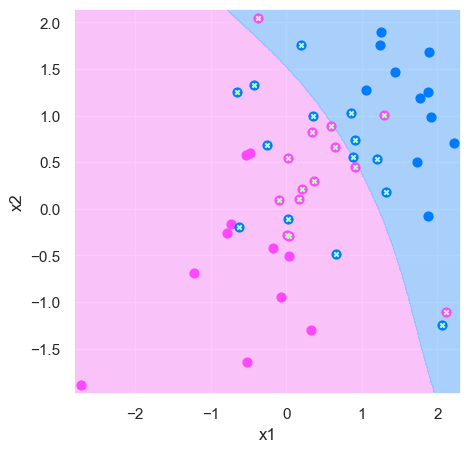

In [24]:
svm_poly_best = grid.best_estimator_

plot_boundary(X, y, svm_poly_best, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_poly_best.support_vectors_[:,0], svm_poly_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

Otro tipo de función de kernel que vimos es la radial, habiamos visto en clase que teniamos el hiperparámetro gamma. Si usamos esta función en [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function), podemos pasar el argumento como **gamma**, al igual que el caso de kernel polinomial.

Para probar este kernel vamos a usar otro dataset sintético

In [25]:
from sklearn.model_selection import train_test_split

X = rng.standard_normal((200, 2)) 
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.5, random_state=0)

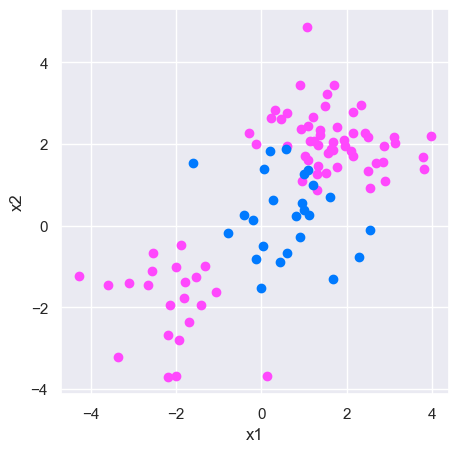

In [26]:
fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c="#ff48fd")
ax.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c="#007aff")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Pero, vamos a realizar primero una busqueda de posibles hiperparametro, tanto para C como para gamma usando **gridsearchCV**

In [27]:
svm_kbf = SVC(kernel='rbf')

grid = GridSearchCV(svm_kbf,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
                     "gamma": [0.5, 1, 2, 3, 4]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.5, 1, 2, 3, 4]},
             scoring='accuracy')

In [28]:
grid.best_params_

{'C': 5, 'gamma': 0.5}

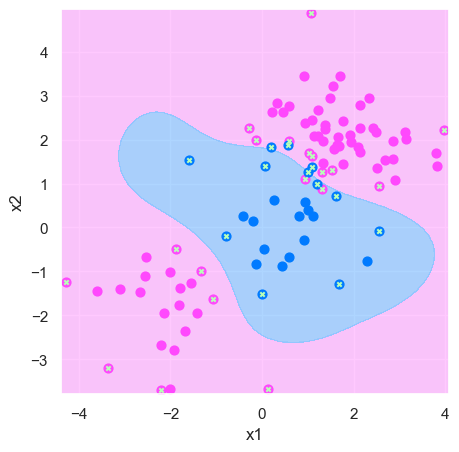

In [29]:
svm_rbf_best = grid.best_estimator_

plot_boundary(X_train, y_train, svm_rbf_best, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_best.support_vectors_[:,0], svm_rbf_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

Podemos evaluar el modelo con un set de testeo

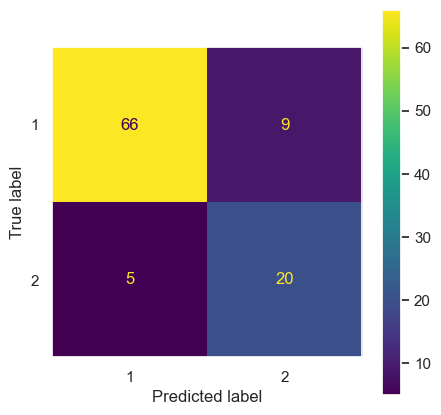

In [30]:
y_pred = svm_rbf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svm_rbf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [31]:
print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 86%


----

## Clasificación de multi-clase con SVM

El modelo [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) implementado por sklearn nos permite realizar clasificacion de multiclase en cualquier de los dos clases que vimos en clase. Para ello tenemos el atributo *decision_function_shape* que puede tomar dos formas:

- 'ovo': Estrategia One vs one
- 'ovr': Estrategia One vs rest (One vs all).

Creemos una data sintetica para este caso:

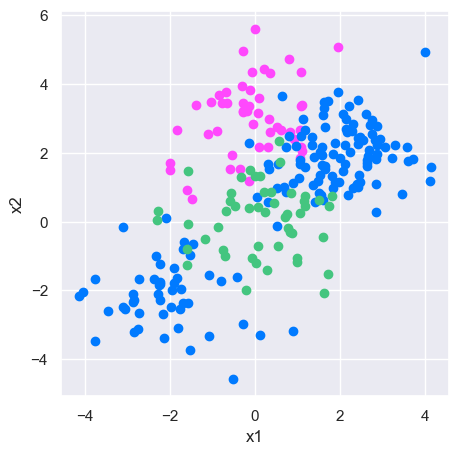

In [32]:
rng = np.random.default_rng(42)

X = rng.standard_normal((200, 2)) 
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

X = np.vstack([X, rng.standard_normal((50, 2))]) 
y = np.hstack([y, [0]*50])
X[y==0,1] += 3

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X[y==0][:,0], X[y==0][:,1], c="#ff48fd")
ax.scatter(X[y==1][:,0], X[y==1][:,1], c="#007aff")
ax.scatter(X[y==2][:,0], X[y==2][:,1], c="#44c57f")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Entrenamos el modelo con un kernel RBF y una estrategia one-vs-one

In [33]:
svm_rbf_3 = SVC(kernel="rbf", C=1, gamma=0.1, decision_function_shape='ovo'); 
svm_rbf_3.fit(X, y)

SVC(C=1, decision_function_shape='ovo', gamma=0.1)

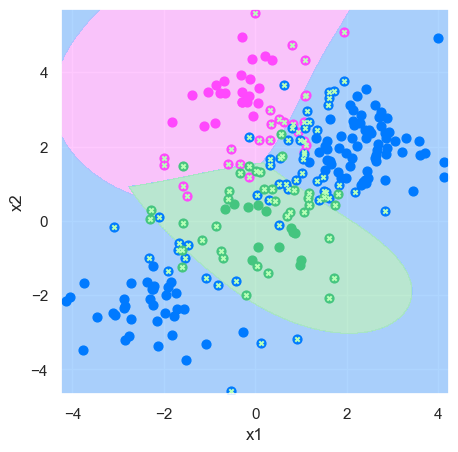

In [34]:
plot_boundary(X, y, svm_rbf_3, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=(0, 1, 2),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_3.support_vectors_[:,0], svm_rbf_3.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

----

## SVC en Heart

Usemos un caso real para probar el modelo, el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease) que usamos anteriormente.

Recordemos que son mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

Para practicar el modelo SVM como clasificador (SVC), vamos a volver a usar el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease), el cual mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [66]:
# Cargamos el dataset
df_heart = pd.read_csv("./Heart.csv")

In [67]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Las clases están bastante balanceadas, voy a usar F1-Score como metrica de evaluación

In [68]:
# Hacemos variable dummy a las categoricas
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]

df_heart_dummies = pd.get_dummies(data=df_heart, columns=categorical_features)

In [69]:
df_heart_dummies.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [70]:
df_heart_dummies.drop(columns=["cp_3", "restecg_2", "slope_2", "ca_4", "thal_3"], inplace=True)

In [74]:
df_heart_dummies.target.value_counts()

1    526
0    499
Name: target, dtype: int64

---
Trabajemos en el modelo

Todas las variables son numericas, por lo que no debemos hacer nada para adaptarlas, mas que normalizarlas. Para este caso vamos a usar todos los atributos.

In [76]:
X = df_heart_dummies.drop(columns='target').values
y = df_heart.iloc[:, -1].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [82]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Vamos a hacer una busqueda de grilla para buscar que modelo se ajustaria mejor.

In [83]:
svm_hearth = SVC()

grid = GridSearchCV(svm_hearth,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='f1')

In [84]:
grid.best_params_

{'C': 100, 'degree': 5, 'kernel': 'poly'}

Elegido el mejor modelo y entrenado, podemos ver el estado

In [85]:
svm_hearth_best = grid.best_estimator_

Y podemos ver que el F1 score nos dio con el dataset de entrenamiento

In [86]:
from sklearn.metrics import f1_score

y_pred = svm_hearth_best.predict(X_test)

f1 = f1_score(y_test, y_pred)

print(f"F1-score de testeo fue: {f1}")

F1-score de testeo fue: 0.9794520547945206


Algo que podemos hacer con los SVM es obtener la curva ROC

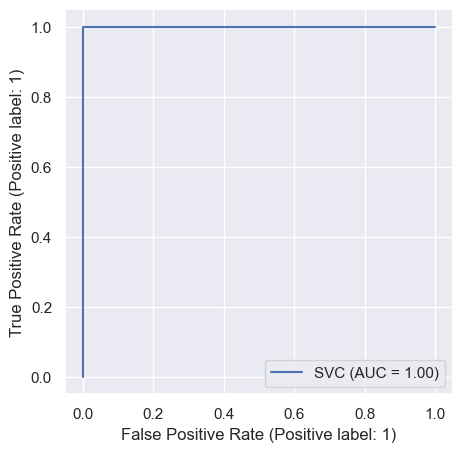

In [87]:
from sklearn.metrics import RocCurveDisplay
    
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(svm_hearth_best, X_test, y_test, ax=ax)

plt.show();

Como vemos el clasificador SVC para este dataset es prácticamente perfecto.

----

## SVM como regresión

Como vimos en clase, SVM tambien se puede usar para realizar regresiones. Scikit-learn nos ofrece la clase [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) que es la implementación de SVM para regresión. 

Para analizar esto, vamos a usar el dataset de **Hitters**. Recordemos que contiene datos de jugadores de beisbol de la liga estadounidense de 1986 y 1987. Contiene 322 observaciones con 20 datos. Lo que queremos hacer es tener alguna regresión de los salarios de 1987 los jugadores usando como base los datos de ellos de su perfomance en 1986.

In [88]:
# Cargamos el dataset
df_hitters = pd.read_csv("./Hitters.csv")

# Como los datos de salario no están completos, descartamos a aquellos jugadores que no tienen ese dato.
df_hitters.dropna(subset="Salary", inplace=True)

# Aplico feature engineering, modificando el target por el logaritmo
df_hitters["Salary_log"] = np.log(df_hitters["Salary"])

In [89]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AtBat       263 non-null    int64  
 1   Hits        263 non-null    int64  
 2   HmRun       263 non-null    int64  
 3   Runs        263 non-null    int64  
 4   RBI         263 non-null    int64  
 5   Walks       263 non-null    int64  
 6   Years       263 non-null    int64  
 7   CAtBat      263 non-null    int64  
 8   CHits       263 non-null    int64  
 9   CHmRun      263 non-null    int64  
 10  CRuns       263 non-null    int64  
 11  CRBI        263 non-null    int64  
 12  CWalks      263 non-null    int64  
 13  League      263 non-null    object 
 14  Division    263 non-null    object 
 15  PutOuts     263 non-null    int64  
 16  Assists     263 non-null    int64  
 17  Errors      263 non-null    int64  
 18  Salary      263 non-null    float64
 19  NewLeague   263 non-null    o

Tenemos todas variables numericas, menos *League*, *Division* y *NewLeague*, que vamos a obtener las variables dummy de ellas

In [90]:
df_hitters.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [91]:
df_hitters.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [92]:
df_hitters.NewLeague.value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [93]:
df_hitters_dummies = pd.get_dummies(data=df_hitters, columns=['League', 'Division', 'NewLeague'])

In [94]:
df_hitters_dummies.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'Salary_log', 'League_A', 'League_N', 'Division_E',
       'Division_W', 'NewLeague_A', 'NewLeague_N'],
      dtype='object')

In [95]:
#Quitamos una columna de las variables dummy
df_hitters_dummies.drop(columns=["League_N", "Division_W", "NewLeague_N", 'Salary'], inplace=True)

Obtenemos los arrays

In [96]:
X_cols = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 
          'PutOuts', 'Assists', 'Errors', 'League_A', 'Division_E', 'NewLeague_A']

X = df_hitters_dummies.loc[:, X_cols].values
# Y como variable a predecir a Salary
y = df_hitters_dummies.loc[:, 'Salary_log'].values

Separamos en el dataset de entrenamiento y testeo

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Ahora escalamos a las variables

In [98]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Vamos a realizar otra busqueda de hiperparametros para evaluar el modelo, nada mas que ahora como metrica vamos a usar MAE, dado que estamos en un caso de regresión

In [99]:
from sklearn.svm import SVR

svm_hitters = SVR()

grid = GridSearchCV(svm_hitters,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf", "sigmoid"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='neg_mean_absolute_error')

In [100]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Según esta busqueda el mejor modelo es uno con función radial.

Evaluemos este modelo con el set de testeo.

In [101]:
from sklearn.metrics import mean_absolute_error

svm_hitters_best = grid.best_estimator_

y_pred = svm_hitters_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"MAE de testeo fue: {mae}")

MAE de testeo fue: 0.3917577246002791


Este modelo tuvo un error de testeo de 0.39, comparando con los arboles tuvimos un resultado de 0.46. Por lo que este modelo de regresión es mejor que el modelo de árbol para el dataset de hitters. Y si lo comparamos con los bosques aleatorios, este modelo performó peor.